In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
img = x_test[-1, :, :]
label = y_test[-1]
print(label)

6


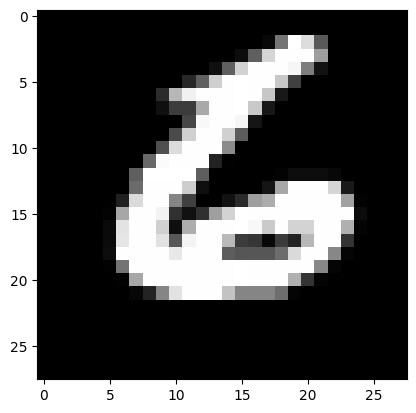

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.shape[0]

60000

In [ ]:
#(60000, 784=28*28)

In [ ]:
#reshape the input images (28,28) to vectors of size 28*28 (flatten)
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [ ]:
print('x_train reshaped', x_train_reshaped.shape)
print('y_train reshaped', y_train.shape)
print('x_test shape', x_test_reshaped.shape)
print('y_test shape', y_test.shape)

x_train reshaped (60000, 784)
y_train reshaped (60000,)
x_test shape (10000, 784)
y_test shape (10000,)


In [ ]:
x_train_reshaped.dtype

dtype('uint8')

In [ ]:
#normalization: original input range: 0-255 / new input range: 0-1
x_train_reshaped_norm = x_train_reshaped.astype('float32')/255
x_test_reshaped_norm = x_test_reshaped.astype('float32')/255

In [ ]:
y_train[0]

5

#one-hot encoding
0 --> [1,0,0,0,0,0,0,0,0,0]
1 --> [0,1,0,0,0,0,0,0,0,0]
2 --> [0,0,1,0,0,0,0,0,0,0]
.
.
.
9 --> [0,0,0,0,0,0,0,0,0,1]

In [ ]:
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
print('x_train reshaped', x_train_reshaped.shape)
print('y_train reshaped', y_train_categorical.shape)
print('x_test shape', x_test_reshaped.shape)
print('y_test shape', y_test_categorical.shape)

x_train reshaped (60000, 784)
y_train reshaped (60000, 10)
x_test shape (10000, 784)
y_test shape (10000, 10)


In [ ]:
y_train[2]

4

In [ ]:
y_train_categorical[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#build the MLP
#compile
#train
#predict
#evaluate on test data

# build the MLP

In [58]:
my_model = tf.keras.Sequential()
#my_model.add(tf.keras.layers.Input(shape=(784,)))
my_model.add(tf.keras.layers.Dense(units=420, activation='relu', input_shape=(784,))) #hidden layer
my_model.add(tf.keras.layers.Dense(units=16, activation='relu')) #hidden layer
# my_model.add(tf.keras.layers.Dense(units=24, activation='relu')) #hidden layer
my_model.add(tf.keras.layers.Dropout(0.1)) #hidden layer
my_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) #output layer

In [59]:
my_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 420)               329700    
                                                                 
 dense_23 (Dense)            (None, 16)                6736      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 10)                170       
                                                                 
Total params: 336606 (1.28 MB)
Trainable params: 336606 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.004),
                 loss="categorical_crossentropy",
                 metrics=['accuracy'])

In [61]:
history = my_model.fit(x=x_train_reshaped_norm,
                        y=y_train_categorical,
                        batch_size=16,
                        epochs=50,
                        verbose=1,
                       validation_split = 0.2)

Epoch 1/50
3000/3000 [==============================] - 20s 7ms/step - loss: 0.3208 - accuracy: 0.9066 - val_loss: 0.1450 - val_accuracy: 0.9592
Epoch 2/50
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1665 - accuracy: 0.9530 - val_loss: 0.1288 - val_accuracy: 0.9653
Epoch 3/50
3000/3000 [==============================] - 18s 6ms/step - loss: 0.1347 - accuracy: 0.9621 - val_loss: 0.1793 - val_accuracy: 0.9467
Epoch 4/50
3000/3000 [==============================] - 18s 6ms/step - loss: 0.1148 - accuracy: 0.9684 - val_loss: 0.1440 - val_accuracy: 0.9665
Epoch 5/50
3000/3000 [==============================] - 20s 7ms/step - loss: 0.1005 - accuracy: 0.9714 - val_loss: 0.1385 - val_accuracy: 0.9657
Epoch 6/50
2200/3000 [=====================>........] - ETA: 4s - loss: 0.0937 - accuracy: 0.9730

KeyboardInterrupt: 

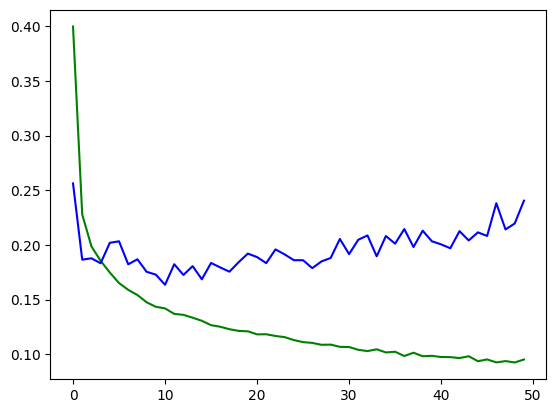

In [44]:
plt.plot(history.history['loss'], color='g')
plt.plot(history.history['val_loss'], color='b')

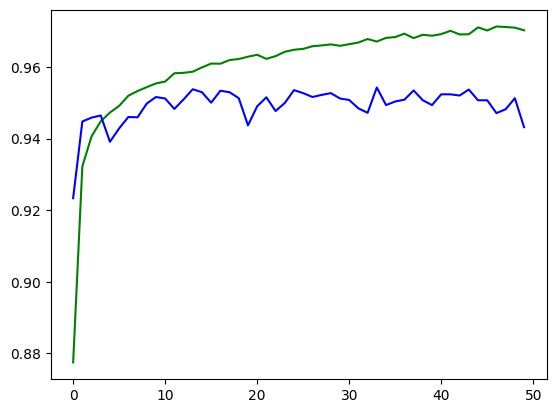

In [45]:
plt.plot(history.history['accuracy'], color='g')
plt.plot(history.history['val_accuracy'], color='b')